question 1

Dimensions of dataset: (150, 4)
Number of samples: 150
Mean of features:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Variance of features:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
Correlation of features:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


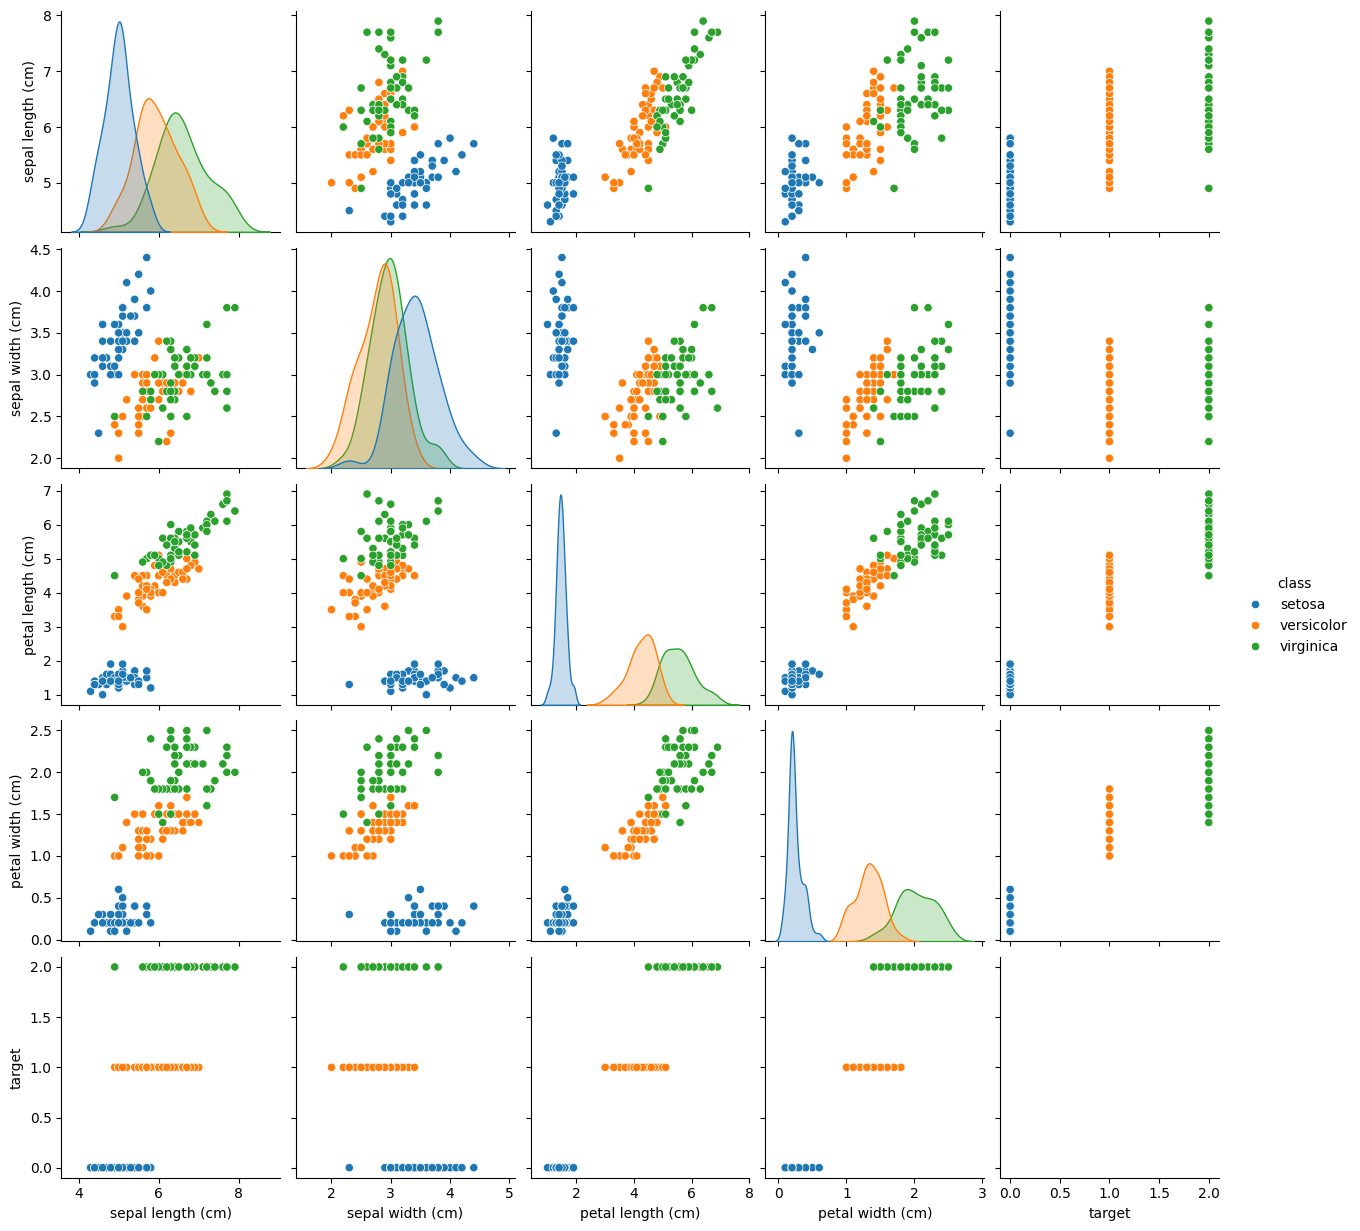

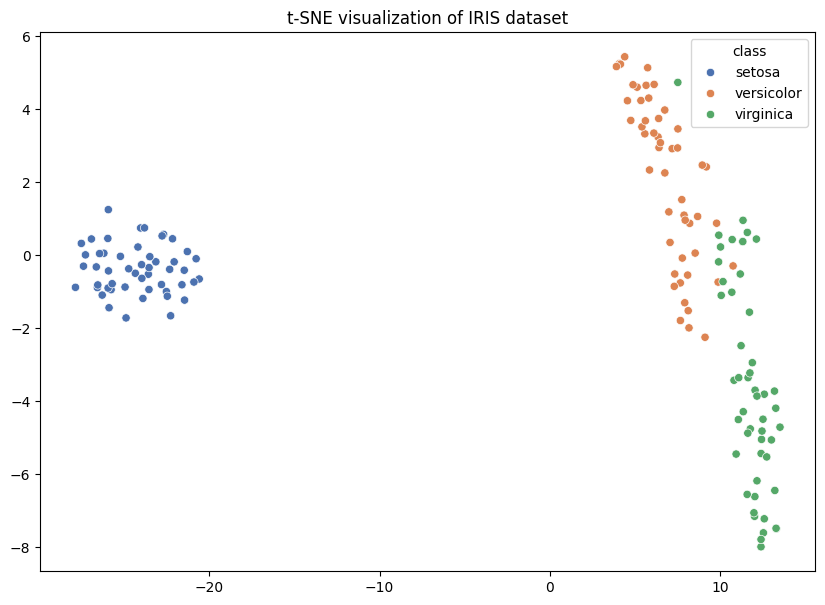

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['class'] = df['target'].map(target_names)


features = df.drop(columns=['target', 'class'])

print("Dimensions of dataset:", features.shape)
print("Number of samples:", len(df))
print("Mean of features:\n", features.mean())
print("Variance of features:\n", features.var())
print("Correlation of features:\n", features.corr())


sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()


tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(iris.data)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['class'], palette="deep", legend="full")
plt.title("t-SNE visualization of IRIS dataset")
plt.show()


In [ ]:
iris.target.shape

(150,)

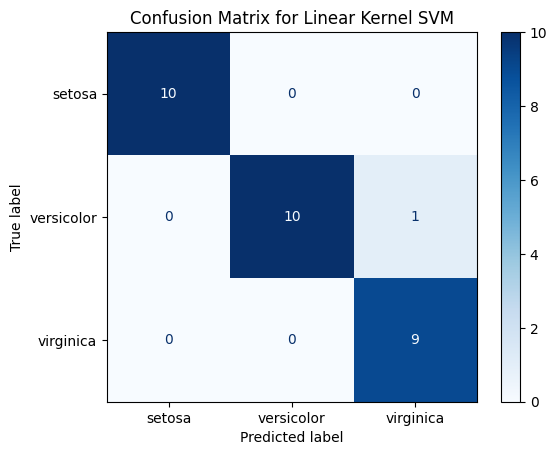

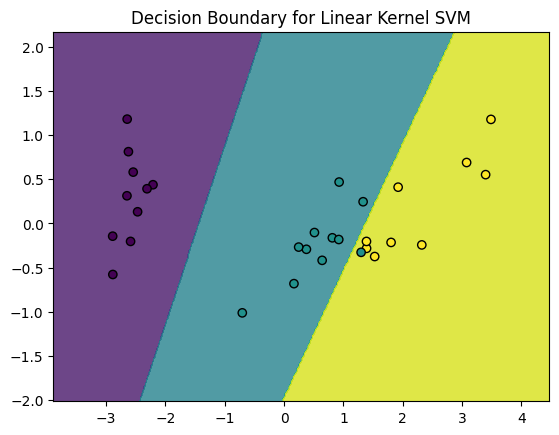

In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(iris.data)
X_reduced_train ,X_reduced_test  , y_train , y_test = train_test_split(X_reduced , iris.target , test_size = 0.2 , random_state = 74)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_reduced_train, y_train)


y_pred = svm_linear.predict(X_reduced_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Linear Kernel SVM")
plt.show()


def plot_decision_boundary(clf, X, y, title , save_path):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.savefig(save_path)
    plt.show()

plot_decision_boundary(svm_linear, X_reduced_test, y_test, "Decision Boundary for Linear Kernel SVM" , save_path = 'svc_linear.png')


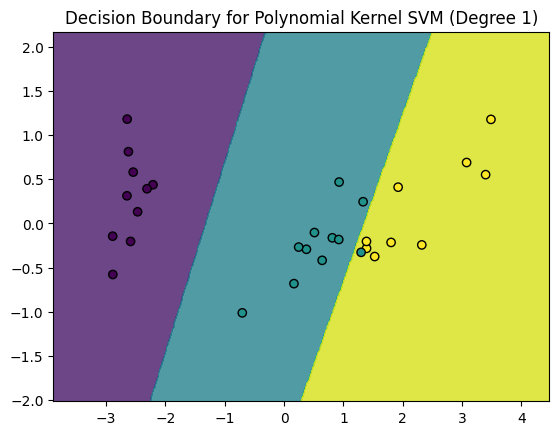

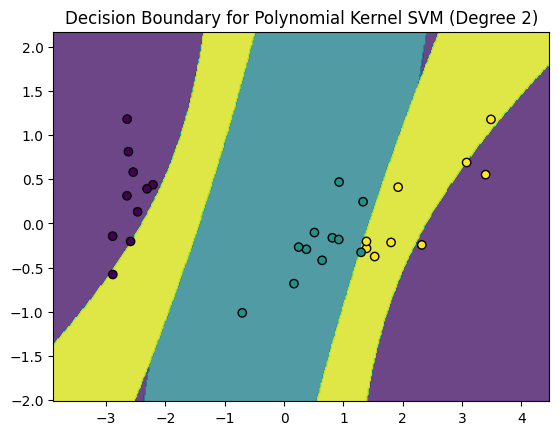

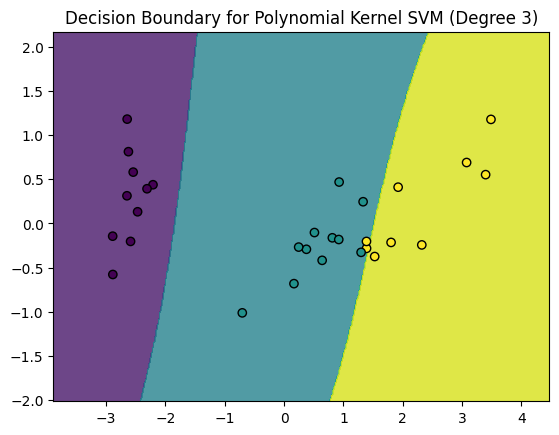

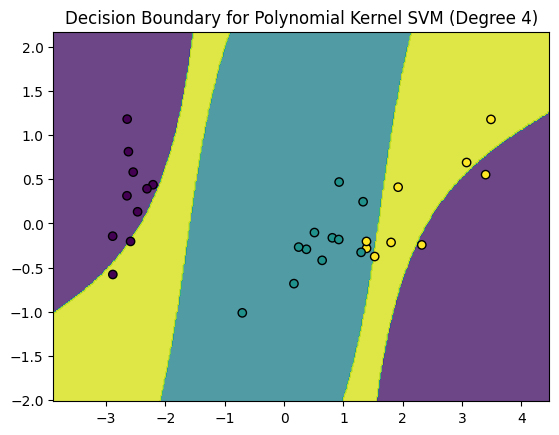

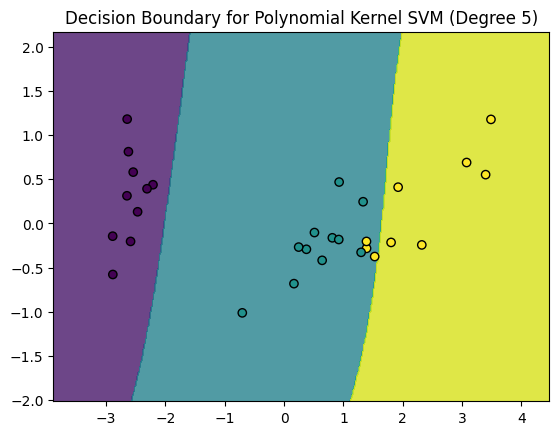

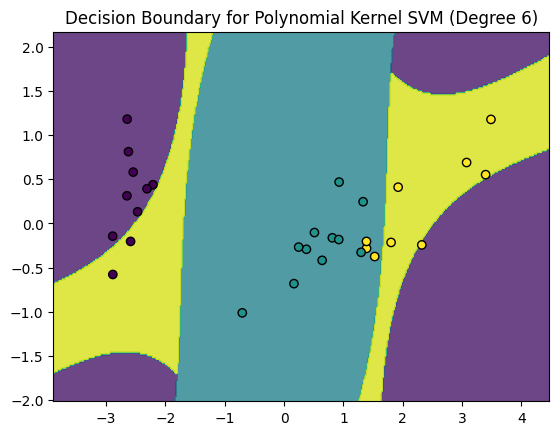

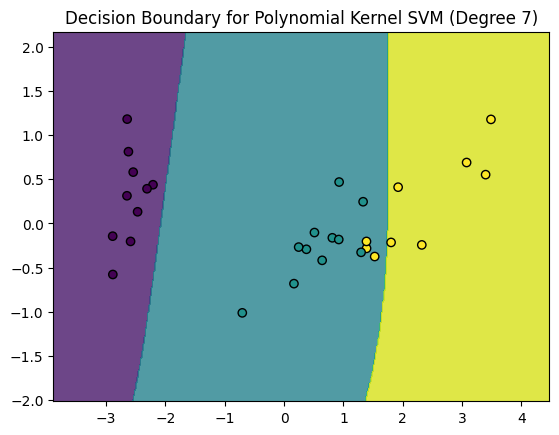

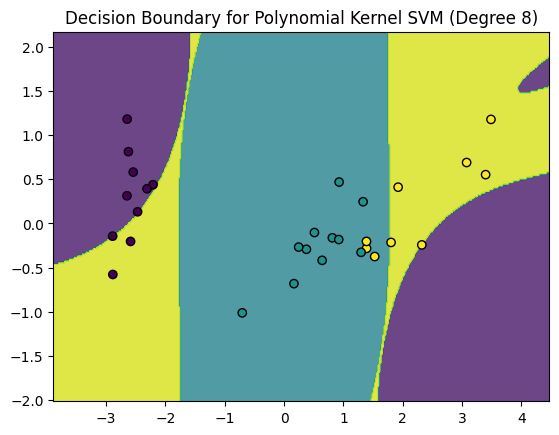

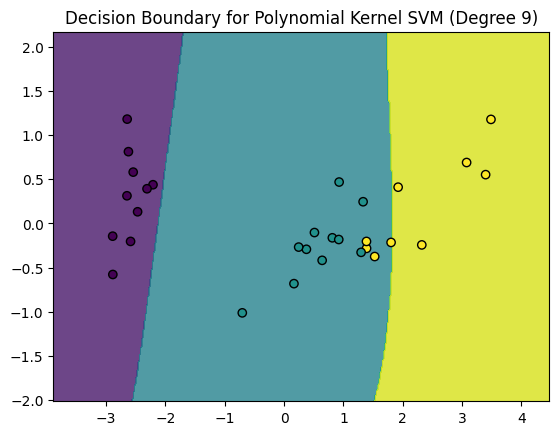

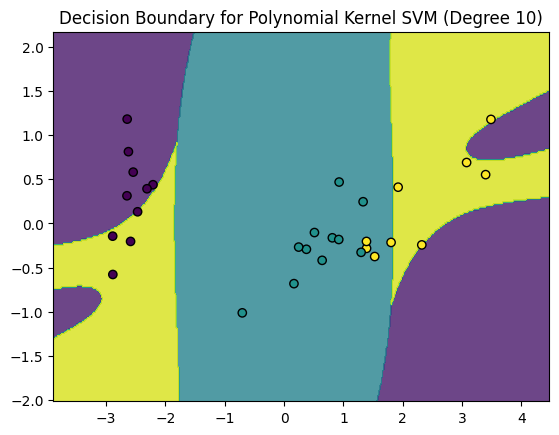

Degree 1: Accuracy = 0.9666666666666667
Degree 2: Accuracy = 0.8733333333333333
Degree 3: Accuracy = 0.9466666666666667
Degree 4: Accuracy = 0.8333333333333334
Degree 5: Accuracy = 0.9066666666666666
Degree 6: Accuracy = 0.7733333333333333
Degree 7: Accuracy = 0.9
Degree 8: Accuracy = 0.7666666666666667
Degree 9: Accuracy = 0.88
Degree 10: Accuracy = 0.74
GIF saved as 'svm_poly_kernels.gif'


<ipython-input-10-ad7db343f641>:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'svm_poly_degree_{degree}.png'))


In [10]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import imageio

results = []
accuracy = []


for degree in range(1, 11):

    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_reduced, iris.target)

    y_pred_poly = svm_poly.predict(X_reduced)
    acc = accuracy_score(iris.target, y_pred_poly)
    accuracy.append(acc)


    plt.figure()
    plot_decision_boundary(svm_poly, X_reduced_test, y_test, f"Decision Boundary for Polynomial Kernel SVM (Degree {degree})" , save_path = f'svm_poly_degree_{degree}.png')


    results.append((degree, acc))


images = []
for degree in range(1, 11):
    images.append(imageio.imread(f'svm_poly_degree_{degree}.png'))
imageio.mimsave('svm_poly_kernels.gif', images, duration=1)


for degree, acc in results:
    print(f"Degree {degree}: Accuracy = {acc}")

print("GIF saved as 'svm_poly_kernels.gif'")



In [5]:
import cvxopt
def linear_kernel( x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel( x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel( x, y, gamma=0.5):
    return np.exp(-gamma*np.linalg.norm(x - y) ** 2)

def sigmoid_kernel( x, y, alpha=1, C=0.01):
    a= alpha * np.dot(x, y) + C
    return np.tanh(a)

def SVM_scratch(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params=(kernel_type,poly_params, RBF_params, sigmoid_params,C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    # solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    # Support vectors have non zero lagrange multipliers
    sv = a > 1e-5  # some small threshold

    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv=len(sv_y)
    # Bias (For linear it is the intercept):
    bias = 0
    for n in range(len(a)):
        # For all support vectors:
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / (len(a)+0.0001)

    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    y_pred=0
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a ,sv_y, sv_x):
                # a : Lagrange multipliers, sv : support vectors.
                # Hypothesis: sign(sum^S a * y * kernel + b)

                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type=='RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)   # Kernel trick.
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s=+ a1 * sv_y1 *sigmoid_kernel( X_t[i],  sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution,a, sv_x, sv_y, y_pred, kernel_and_params



def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))

    classifiers = {}
    w_catch = {}  # catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    for i, class_label in enumerate(class_labels):
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, solution, a, sv_x, sv_y, prediction, kernel_and_params = SVM_scratch(X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = (w, bias, a, sv_x, sv_y, kernel_and_params)
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[label]
            if w is not None:
                decision_scores[:, i] = np.dot(X_t, w) + bias
            else:
                decision_values = np.zeros(X_t.shape[0])
                for j in range(X_t.shape[0]):
                    s = 0
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        if kernel_type == 'linear':
                            s += a1 * sv_y1 * linear_kernel(X_t[j], sv1)
                        elif kernel_type == 'RBF':
                            s += a1 * sv_y1 * gaussian_kernel(X_t[j], sv1, RBF_params)
                        elif kernel_type == 'polynomial':
                            s += a1 * sv_y1 * polynomial_kernel(X_t[j], sv1, poly_params[0], poly_params[1])
                        elif kernel_type == 'sigmoid':
                            s += a1 * sv_y1 * sigmoid_kernel(X_t[j], sv1, sigmoid_params[0], sigmoid_params[1])
                    decision_values[j] = s
                decision_scores[:, i] = decision_values + bias
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

def visualize_multiclass_classification1(X_train, y_train1, kernel_type, trainset, classifiers, class_labels, w_stack, b_stack,save_path_scr, epsilon=1e-10):
    plt.figure(figsize=(6, 4))
    for i, target_name in enumerate(class_labels):
        plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

    if kernel_type == 'linear':
        for i in range(len(class_labels)):
            w = w_stack[i]
            bias = b_stack[i]
            x_points = np.linspace(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1, 200)
            y_points = -(w[0] / (w[1] + epsilon)) * x_points - bias / (w[1] + epsilon)
            plt.plot(x_points, y_points, c='r', label='Decision Boundary')

    elif kernel_type == 'polynomial':
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = np.zeros(xx.shape)
        for i in range(len(class_labels)):
            Z = np.zeros(xx.shape)
            for j in range(xx.shape[0]):
                for k in range(xx.shape[1]):
                    sample_point = np.array([xx[j, k], yy[j, k]])
                    decision_value = 0
                    w, bias, a, sv_x, sv_y, kernel_and_params = classifiers[i]
                    for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                        decision_value += a1 * sv_y1 * polynomial_kernel(sample_point, sv1, C=kernel_and_params[1][0], d=kernel_and_params[1][1])
                    decision_value += bias
                    Z[j, k] = decision_value
            plt.contour(xx, yy, Z, levels=[0], colors='r')

    if trainset:
        plt.title('Data Points')
    else:
        plt.title('Data Points on Test Set')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
    plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
    plt.savefig(save_path_scr)
    plt.show()

Training with polynomial degree 1
Degree: 1, Accuracy: 0.9666666666666667


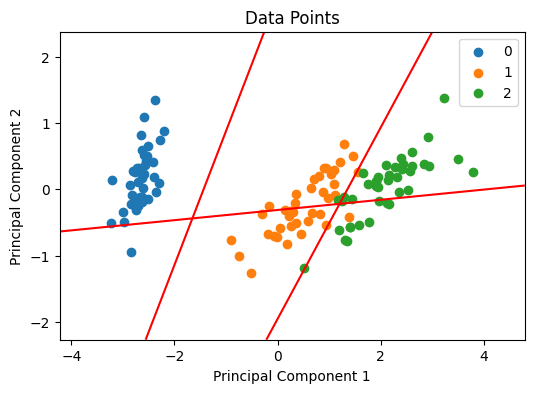

Training with polynomial degree 2
Degree: 2, Accuracy: 0.9666666666666667


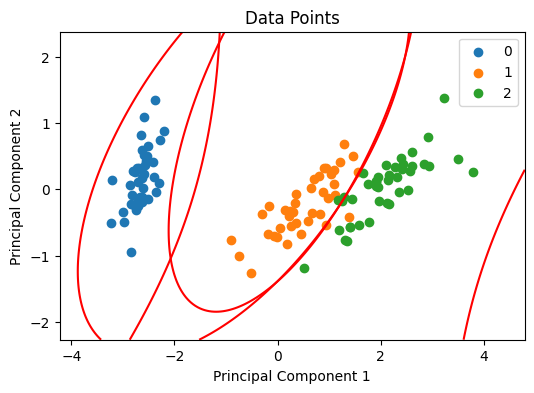

Training with polynomial degree 3
Degree: 3, Accuracy: 0.9666666666666667


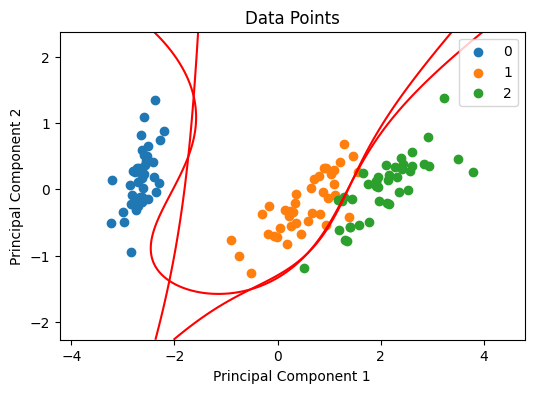

Training with polynomial degree 4
Degree: 4, Accuracy: 0.9666666666666667


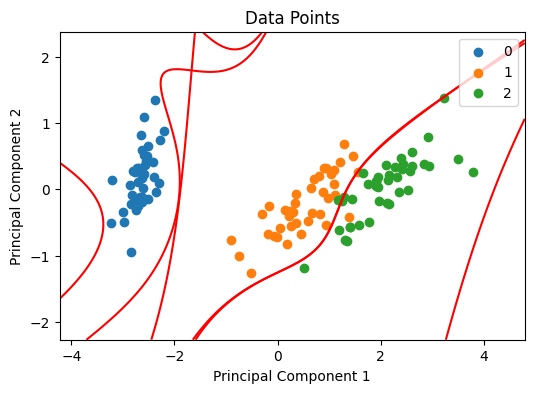

Training with polynomial degree 5
Degree: 5, Accuracy: 0.9666666666666667


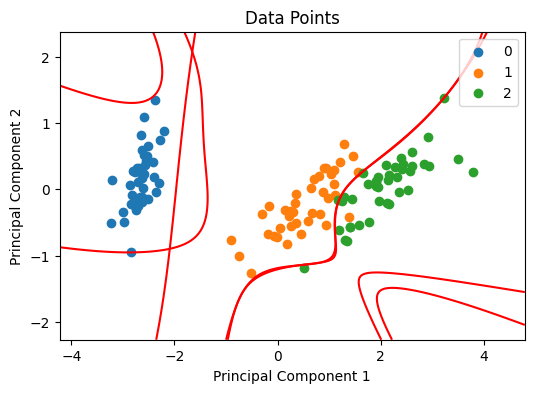

Training with polynomial degree 6
Degree: 6, Accuracy: 0.9333333333333333


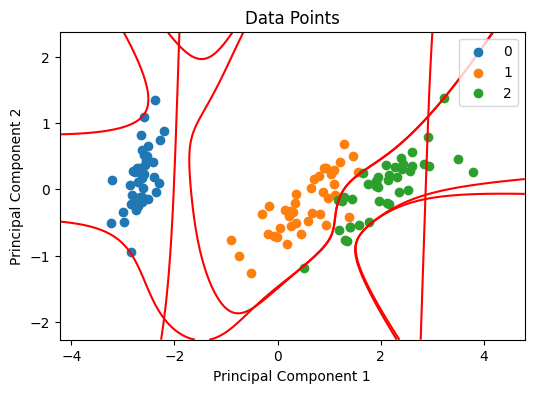

Training with polynomial degree 7
Degree: 7, Accuracy: 0.9


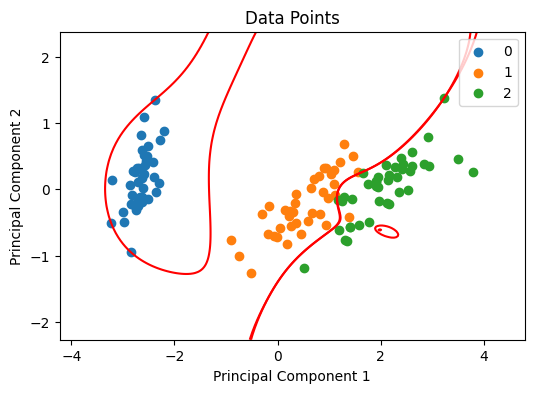

Training with polynomial degree 8
Degree: 8, Accuracy: 0.7


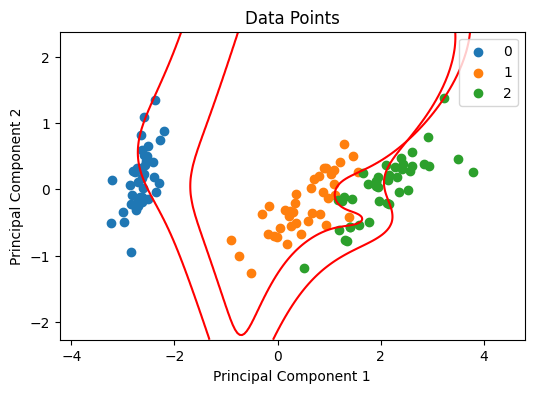

Training with polynomial degree 9
Degree: 9, Accuracy: 0.5333333333333333


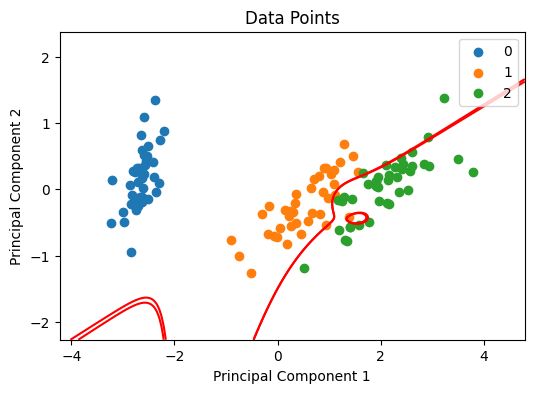

Training with polynomial degree 10
Degree: 10, Accuracy: 0.5666666666666667


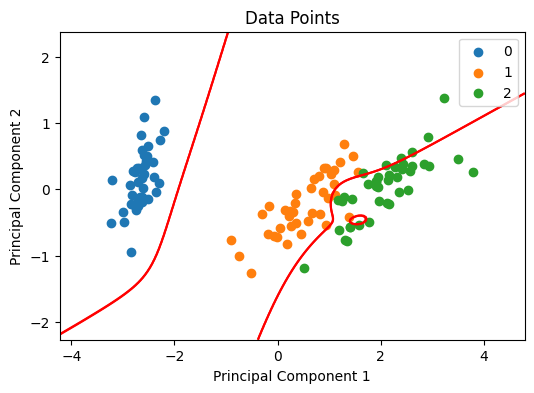

In [6]:
accuracies = []
from sklearn.metrics import accuracy_score
for degree in range(1, 11):
    print(f"Training with polynomial degree {degree}")
    predictions, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
        X_reduced_train, X_reduced_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1.0, degree)
    )
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Degree: {degree}, Accuracy: {accuracy}")

    visualize_multiclass_classification1(X_reduced_train, y_train, 'polynomial', True, classifiers, np.unique(y_train), w_catch, b_catch , save_path_scr = f'polynum_scratch_degree{degree}')

In [8]:
import imageio

images_scr = []
for degree in range(1, 11):
    images_scr.append(imageio.imread(f'/content/polynum_scratch_degree{degree}.png'))
imageio.mimsave('svm_poly_scratch_kernels.gif', images_scr, duration=1)
print("GIF saved as 'svm_poly_scratch_kernels.gif'")


<ipython-input-8-77ea68c26ac3>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_scr.append(imageio.imread(f'/content/polynum_scratch_degree{degree}.png'))


GIF saved as 'svm_poly_scratch_kernels.gif'


In [11]:
accuracy_scr = []
for degree , acc in results:
  accuracy_scr.append(acc)

In [12]:
# comparing results
for i in range(10):
  print(f'accuracy in degree{i+1}:\n sklearn_model:{accuracy_scr[i]} and our model:{accuracies[i]}')

accuracy in degree1:
 sklearn_model:0.9666666666666667 and our model:0.9666666666666667
accuracy in degree2:
 sklearn_model:0.8733333333333333 and our model:0.9666666666666667
accuracy in degree3:
 sklearn_model:0.9466666666666667 and our model:0.9666666666666667
accuracy in degree4:
 sklearn_model:0.8333333333333334 and our model:0.9666666666666667
accuracy in degree5:
 sklearn_model:0.9066666666666666 and our model:0.9666666666666667
accuracy in degree6:
 sklearn_model:0.7733333333333333 and our model:0.9333333333333333
accuracy in degree7:
 sklearn_model:0.9 and our model:0.9
accuracy in degree8:
 sklearn_model:0.7666666666666667 and our model:0.7
accuracy in degree9:
 sklearn_model:0.88 and our model:0.5333333333333333
accuracy in degree10:
 sklearn_model:0.74 and our model:0.5666666666666667


question 3

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [14]:
!gdown 1n5RV7u62SjBK5-Degrx_DqyvHaB0agiJ

Downloading...
From (original): https://drive.google.com/uc?id=1n5RV7u62SjBK5-Degrx_DqyvHaB0agiJ
From (redirected): https://drive.google.com/uc?id=1n5RV7u62SjBK5-Degrx_DqyvHaB0agiJ&confirm=t&uuid=a0541cd8-6fe5-4562-aac1-da8fc492bb0c
To: /content/creditcard.csv
100% 151M/151M [00:06<00:00, 24.7MB/s]


In [16]:
data = pd.read_csv('/content/creditcard.csv')


X = data.drop(columns=['Time', 'Class'])
y = data['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=74, stratify=y)


sm = SMOTE(random_state=74)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [17]:
dae = Sequential([
    Input(shape=(X_res.shape[1],)),
    GaussianNoise(0.1),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
    Dense(X_res.shape[1], activation='sigmoid')
])

dae.compile(optimizer='adam', loss='mean_squared_error')


es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('dae_best_model.h5', monitor='val_loss', save_best_only=True)


dae.fit(X_res, X_res, epochs=100, batch_size=256, validation_split=0.2, callbacks=[es, mc])


Epoch 1/100
1422/1422 [==============================] - 9s 5ms/step - loss: 8.6344 - val_loss: 21.2328
Epoch 2/100
  19/1422 [..............................] - ETA: 8s - loss: 9.1066

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 6s 4ms/step - loss: 8.5170 - val_loss: 21.2228
Epoch 3/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.5056 - val_loss: 21.2196
Epoch 4/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.4965 - val_loss: 21.2164
Epoch 5/100
1422/1422 [==============================] - 5s 4ms/step - loss: 8.4837 - val_loss: 21.2093
Epoch 6/100
1422/1422 [==============================] - 8s 5ms/step - loss: 8.4748 - val_loss: 21.2055
Epoch 7/100
1422/1422 [==============================] - 5s 4ms/step - loss: 8.4692 - val_loss: 21.1972
Epoch 8/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.4639 - val_loss: 21.1954
Epoch 9/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.4614 - val_loss: 21.1934
Epoch 10/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.4583 - val_loss: 21.1935
Epoch 11/100
1422/1422 [==============================] - 8s 6ms/step - los

In [18]:
X_res_denoised = dae.predict(X_res)
X_test_denoised = dae.predict(X_test)


classifier = Sequential([
    Input(shape=(X_res_denoised.shape[1],)),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


es_clf = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc_clf = ModelCheckpoint('classifier_best_model.h5', monitor='val_loss', save_best_only=True)


classifier.fit(X_res_denoised, y_res, epochs=100, batch_size=256, validation_split=0.2, callbacks=[es_clf, mc_clf])


1781/1781 [==============================] - 4s 2ms/step
Epoch 1/100
1422/1422 [==============================] - 7s 4ms/step - loss: 0.1451 - accuracy: 0.9462 - val_loss: 0.0981 - val_accuracy: 0.9634
Epoch 2/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0599 - accuracy: 0.9782 - val_loss: 0.0606 - val_accuracy: 0.9771
Epoch 3/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9828 - val_loss: 0.0451 - val_accuracy: 0.9840
Epoch 4/100
1422/1422 [==============================] - 6s 5ms/step - loss: 0.0411 - accuracy: 0.9851 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 5/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0370 - accuracy: 0.9867 - val_loss: 0.0473 - val_accuracy: 0.9839
Epoch 6/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.0290 - val_accuracy: 0.9921
Epoch 7/100
1422/1422 [==============================] - 7s 5ms/step - lo

1781/1781 [==============================] - 7s 4ms/step
Confusion Matrix:
[[56210   654]
 [   16    82]]
Accuracy: 0.9882377725501211
Precision: 0.11141304347826086
Recall: 0.8367346938775511
F1 Score: 0.19664268585131894


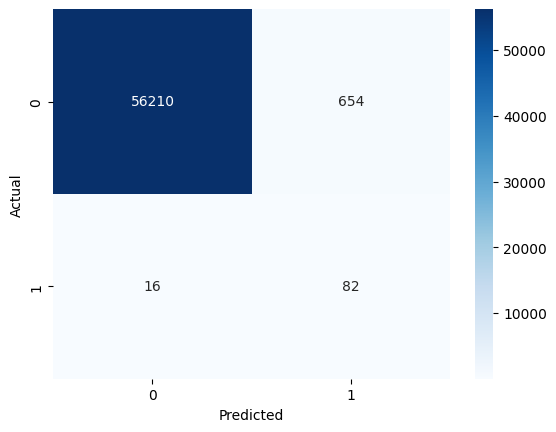

In [27]:
y_pred_prob = classifier.predict(X_test_denoised)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Confusion Matrix:\n{cm}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/100
1422/1422 [==============================] - 8s 5ms/step - loss: 0.0243 - accuracy: 0.9914 - val_loss: 0.0201 - val_accuracy: 0.9953
Epoch 2/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 3/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0145 - val_accuracy: 0.9976
Epoch 4/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 5/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 0.0276 - val_accuracy: 0.9923
Epoch 6/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0184 - val_accuracy: 0.9962
Epoch 7/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.0155 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 4s 3ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.0150 - val_accuracy: 0.9973
Epoch 6/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.0159 - val_accuracy: 0.9967
Epoch 7/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0209 - accuracy: 0.9928 - val_loss: 0.0335 - val_accuracy: 0.9902
Epoch 8/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0231 - val_accuracy: 0.9944
Epoch 9/100
1781/1781 [==============================] - 4s 2ms/step
Epoch 1/100
1422/1422 [==============================] - 6s 3ms/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0167 - val_accuracy: 0.9968
Epoch 2/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0170 - val_accuracy: 0.9961
Epoch 3/100
1422/1422 [==============================] - 5s 3ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 7s 5ms/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.0151 - val_accuracy: 0.9968
Epoch 8/100
1422/1422 [==============================] - 4s 3ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0378 - val_accuracy: 0.9874
Epoch 9/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0186 - val_accuracy: 0.9962
Epoch 10/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 11/100
1781/1781 [==============================] - 3s 2ms/step
Epoch 1/100
1422/1422 [==============================] - 8s 5ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.0170 - val_accuracy: 0.9966
Epoch 2/100
1422/1422 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0114 - val_accuracy: 0.9978
Epoch 3/100
1422/1422 [==============================] - 5s 4ms/step - 

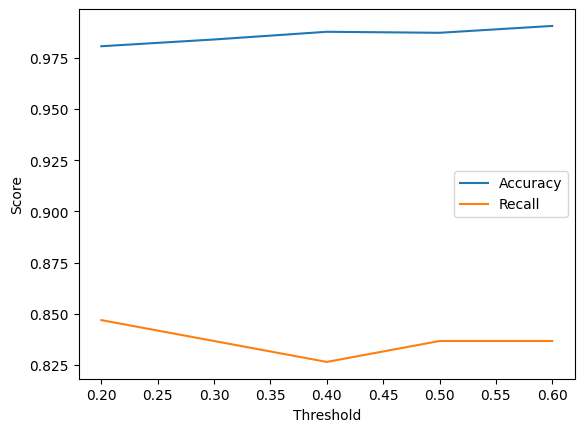

In [29]:
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
accuracies = []
recalls = []

for threshold in thresholds:
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    classifier.fit(X_res_denoised, y_res, epochs=100, batch_size=256, validation_split=0.2, callbacks=[es_clf, mc_clf])

    y_pred_prob = classifier.predict(X_test_denoised)[:, 1]
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)

    accuracies.append(accuracy)
    recalls.append(recall)

plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()


Epoch 1/100
713/713 [==============================] - 6s 5ms/step - loss: 0.0393 - accuracy: 0.9965 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/100
713/713 [==============================] - 4s 6ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


713/713 [==============================] - 3s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 10/100
713/713 [==============================] - 4s 5ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 11/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 12/100
713/713 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 13/100
1781/1781 [==============================] - 5s 3ms/step
Confusion Matrix (Unbalanced):
[[56853    11]
 [   23    75]]
Accuracy (Unbalanced): 0.999403110845827
Precision (Unbalanced): 0.872093023255814
Recall (Unbalanced): 0.7653061224489796
F1 Score (Unbalanced): 0.8152173913043479


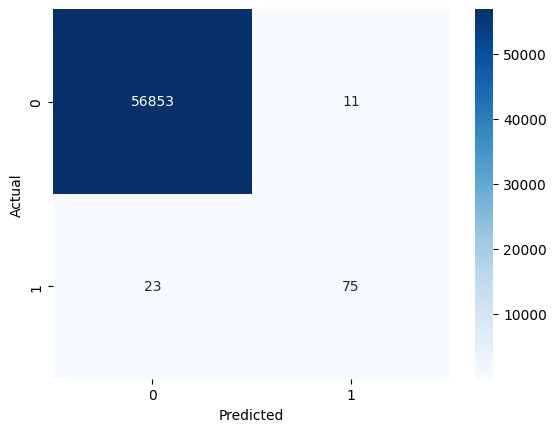

In [32]:
classifier_unbalanced = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])

classifier_unbalanced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


classifier_unbalanced.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks=[es_clf, mc_clf])


y_pred_prob_unbalanced = classifier_unbalanced.predict(X_test)
y_pred_unbalanced = np.argmax(y_pred_prob_unbalanced, axis=1)

cm_unbalanced = confusion_matrix(y_test, y_pred_unbalanced)
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)
precision_unbalanced = precision_score(y_test, y_pred_unbalanced)
recall_unbalanced = recall_score(y_test, y_pred_unbalanced)
f1_unbalanced = f1_score(y_test, y_pred_unbalanced)


print(f'Confusion Matrix (Unbalanced):\n{cm_unbalanced}')
print(f'Accuracy (Unbalanced): {accuracy_unbalanced}')
print(f'Precision (Unbalanced): {precision_unbalanced}')
print(f'Recall (Unbalanced): {recall_unbalanced}')
print(f'F1 Score (Unbalanced): {f1_unbalanced}')


sns.heatmap(cm_unbalanced, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
